In [12]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

In [13]:
def add_bias(X):
    return np.concatenate([X,np.ones((X.shape[0],1))],1)

def relu(x):
    return np.maximum(x,0)

def predict(w,U,x):
    return w.dot(relu(U.dot(x)))

def get_grad(w,U,y,x):
    h=relu(U.dot(x))
    sigmap=U.dot(x)>0+0.
    yh=predict(w,U,x)
    r=yh-y
    grad_w=r*h
    grad_U=r*np.outer(w*sigmap,x)
    return grad_w,grad_U

def loss(w,U,Y,X):
    return npl.norm(Y-predict(w,U,X))**2

Text(0.5, 1.0, 'Test')

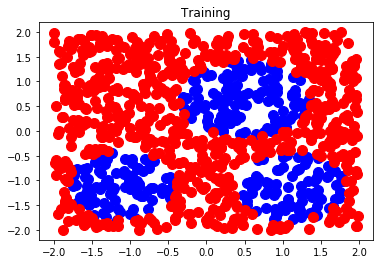

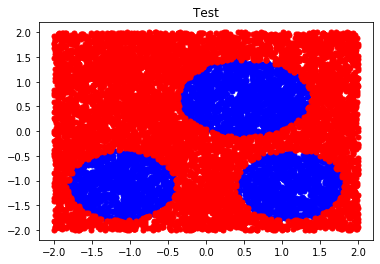

In [14]:
# Let us create a dataset

def label_data(X):
    N=X.shape[0]
    Y=np.zeros(N)
    for i in range(N):
        if (0.8*(X[i,0]-1/2)**2+(X[i,1]-2/3)**2>0.6) and ((X[i,0]+1.1)**2+(X[i,1]+1.1)**2>0.5) and ((X[i,0]-1.1)**2+(X[i,1]+1.1)**2>0.5):
            Y[i]=1
        else:
            Y[i]=0
    return Y
    
N=1000 # Amount of training data
X=(np.random.rand(N,2)-0.5)*4
Y=label_data(X)
Xt=(np.random.rand(10000,2)-0.5)*4
Yt=label_data(Xt)

ix0=Y==0
ix1=Y==1
plt.figure()
plt.plot(X[ix0,0],X[ix0,1],'b.',MarkerSize=20)
plt.plot(X[ix1,0],X[ix1,1],'r.',MarkerSize=20)
plt.title('Training')

ix0=Yt==0
ix1=Yt==1
plt.figure()
plt.plot(Xt[ix0,0],Xt[ix0,1],'b.',MarkerSize=10)
plt.plot(Xt[ix1,0],Xt[ix1,1],'r.',MarkerSize=10)
plt.title('Test')

Normalized Loss: 0.9983271697875441
Normalized Loss: 0.22401175076206115
Normalized Loss: 0.16905476260361701
Normalized Loss: 0.14300073274455877
Normalized Loss: 0.1214438653950301
Normalized Loss: 0.11411495786750071


Text(0.5, 1.0, 'Test')

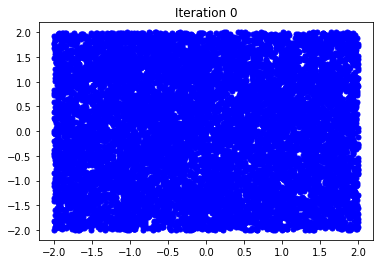

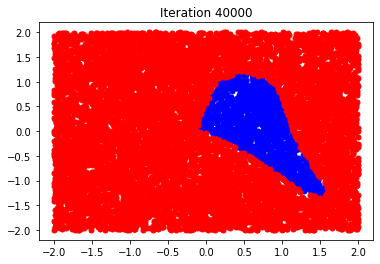

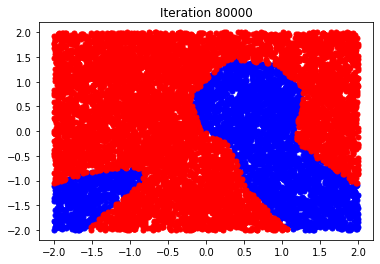

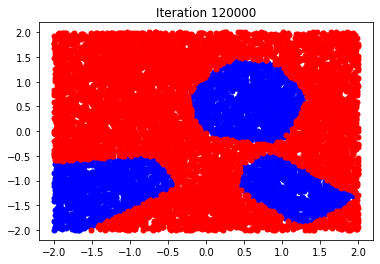

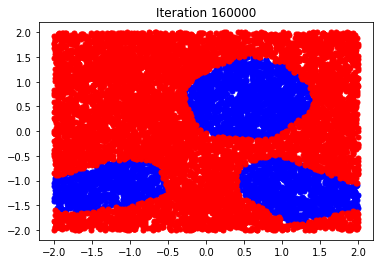

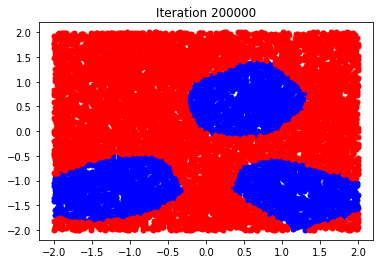

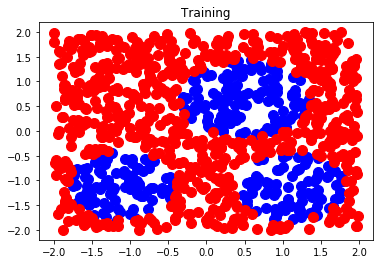

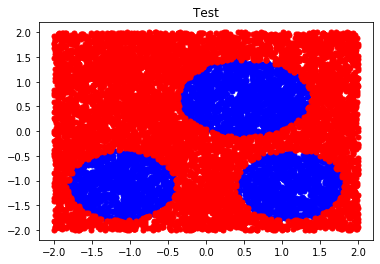

In [16]:
# My neural network
k=500  # Number of hidden units
d=3  # Input dimension. The third dimension is for bias
U=np.random.randn(k,d)*0.01 # Input layer
w=np.random.randn(k)*0.01 # Output layer

eta=5.  # learning rate

Xb=add_bias(X)
Xbt=add_bias(Xt)

ITNUM=200001
for it in range(ITNUM):
    grad_w=0
    grad_U=0
    for i in np.argsort(np.random.randn(N))[:50]:
        gw,gU=get_grad(w,U,Y[i],Xb[i])
        grad_w+=gw
        grad_U+=gU
    w-=eta*grad_w/N
    U-=eta*grad_U/N
    
    if it%int(ITNUM/5)==0:
        print('Normalized Loss:',loss(w,U,Y,Xb.T)/npl.norm(Y)**2)
        Yh=predict(w,U,Xbt.T)>0.5+0.
        ix0=Yh==0
        ix1=Yh==1
        plt.figure()
        plt.plot(Xt[ix0,0],Xt[ix0,1],'b.',MarkerSize=10)
        plt.plot(Xt[ix1,0],Xt[ix1,1],'r.',MarkerSize=10)
        plt.title('Iteration '+str(it))

plt.figure()
ix0=Y==0
ix1=Y==1
plt.plot(X[ix0,0],X[ix0,1],'b.',MarkerSize=20)
plt.plot(X[ix1,0],X[ix1,1],'r.',MarkerSize=20)
plt.title('Training')

ix0=Yt==0
ix1=Yt==1
plt.figure()
plt.plot(Xt[ix0,0],Xt[ix0,1],'b.',MarkerSize=10)
plt.plot(Xt[ix1,0],Xt[ix1,1],'r.',MarkerSize=10)
plt.title('Test')